In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as tk

import os
import ntpath
import re

from matplotlib.colors import ListedColormap

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as tk
import os
import ntpath
import re
from matplotlib.colors import ListedColormap

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score
import matplotlib as mpl
from matplotlib import rc, rcParams

In [2]:
plt.rcParams["font.family"] = "Arial"

plt.rcParams['ps.useafm'] = True
plt.rcParams['pdf.fonttype'] = 42

mpl.font_manager.FontManager()


# make the numbers on axis bold
rc('font', weight='bold')

In [3]:
# manually replace the TDDFT results 
# read the .out files and get gap values
gauss_outs = []
output_counter = 0
gaps_read_counter = 0
outputtddft_names = []

for filename in os.listdir():
    if filename.endswith("tddft.out"):
        #print(os.path.join( filename))
        gauss_out = ntpath.basename(filename)
        gauss_outs.append(gauss_out)
        output_counter += 1
    elif filename.endswith(".csv"):
        Desired_gaps = os.path.join(filename)
    else:
        continue

gaps_tddft = []
for gauss in gauss_outs:
    convergence_check = 0
    gauss_path =  gauss
    f = open(gauss_path,'r')
    liness = f.readlines()
    #print (liness[-1])
    homo_count = 0
    #if '### All Done ###\n' in liness:
        #if liness[-2][1:7]=='Normal':
    for count, line in enumerate(liness):
        if re.search('Alpha  occ. eigenvalues --', line, re.IGNORECASE):
            homo_count += 1
    counter = 0
    for count, line in enumerate(liness):
        if re.search('Alpha  occ. eigenvalues --', line, re.IGNORECASE):
            counter += 1
            if counter == homo_count:
                gaps_read_counter += 1
                convergence_check = 1
                homo_gap = liness[count].split()
                print (homo_gap)
                lumo_gap = liness[count+1].split()
                print (lumo_gap)
                outputtddft_names.append(gauss)
                #print (gap_line[2])
                # 1 Hurtree = 27.2114 (eV) 
                gaps_tddft.append(27.2114079527*(float(lumo_gap[4]) - float (homo_gap[-1])))
        #else:
            #print ("gauss did not converged properly", gauss)
    #else:
        #print ("gauss did not converged properly", gauss)
print (gaps_tddft)
print (outputtddft_names)

['Alpha', 'occ.', 'eigenvalues', '--', '-0.33650', '-0.28684', '-0.27779', '-0.19662']
['Alpha', 'virt.', 'eigenvalues', '--', '-0.09331', '-0.02232', '-0.01730', '0.00049', '0.01371']
['Alpha', 'occ.', 'eigenvalues', '--', '-0.27409']
['Alpha', 'virt.', 'eigenvalues', '--', '-0.03548', '-0.02979', '-0.02312', '-0.01152', '-0.00049']
[2.8112105555934366, 6.492914051593747]
['OdC1CCdCCdC1CqOrdCqOrO_tddft.out', 'CCqOrdNCqCCqdOrOrCqdOrO_tddft.out']


In [4]:
print ("Total output files: ", output_counter)
print ("Total successfully read gaps: ", gaps_read_counter)
print ("all done")
#search through the excel file to find Desired gap
#ff = open(Desired_gaps,'r')
gen_desired = pd.read_csv(Desired_gaps)
#gen_desired = gen_desired.reset_index()

# get rid of .out form output files
outputtddft_names = [i.replace("_tddft.out","") for i in outputtddft_names]
print ("output names before conversion--------------------->\n", outputtddft_names)

for jj,ii in enumerate(outputtddft_names):
    p_counter = 0
    for kk,char in enumerate(ii):
        
        # insert "=" instead of "d", "#" instead of "t", '(' instead of q, ')' instead of r
        outputtddft_names[jj] = outputtddft_names[jj].replace("q","(")
        outputtddft_names[jj] = outputtddft_names[jj].replace("r",")")
        outputtddft_names[jj] = outputtddft_names[jj].replace("d","=")
        outputtddft_names[jj] = outputtddft_names[jj].replace("t","#")

print ("output names after conversion------------------------->\n ", outputtddft_names)
outputtddft_names

Total output files:  2
Total successfully read gaps:  2
all done
output names before conversion--------------------->
 ['OdC1CCdCCdC1CqOrdCqOrO', 'CCqOrdNCqCCqdOrOrCqdOrO']
output names after conversion------------------------->
  ['O=C1CC=CC=C1C(O)=C(O)O', 'CC(O)=NC(CC(=O)O)C(=O)O']


['O=C1CC=CC=C1C(O)=C(O)O', 'CC(O)=NC(CC(=O)O)C(=O)O']

In [5]:
# choose the SMILES that we have DFT values

# create .csv file
dft_smiles_gap = {}
for smile in outputtddft_names:
    dft_smiles_gap['SMILES'] = outputtddft_names 
    dft_smiles_gap['TDDFT_gap'] = gaps_tddft

    #output['Desired_gap'] = gen_desired['gap']

dft_smiles_gap = pd.DataFrame(dft_smiles_gap)
merged_output = pd.merge(gen_desired, dft_smiles_gap, on='SMILES') 
merged_output["RE_TDDFT"] = np.abs((merged_output["TDDFT_gap"] - merged_output["gap_pubchemqc"])/ merged_output["gap_pubchemqc"]*100)
output_tddft = pd.DataFrame(merged_output)
output_tddft

,SMILES,gap_pubchemqc,TDDFT_gap,RE_TDDFT
0,CC(O)=NC(CC(=O)O)C(=O)O,6.781,6.492914,4.248429
1,O=C1CC=CC=C1C(O)=C(O)O,2.580,2.811211,8.961649


In [6]:
# read the .out files and get gap values
gauss_outs = []
output_counter = 0
gaps_read_counter = 0
output_names = []

for filename in os.listdir():
    if filename.endswith(".out"):
        #print(os.path.join( filename))
        gauss_out = ntpath.basename(filename)
        gauss_outs.append(gauss_out)
        output_counter += 1
    elif filename.endswith(".csv"):
        Desired_gaps = os.path.join(filename)
    else:
        continue

In [7]:
len(gauss_outs)

59

In [8]:
gaps_dft = []
for gauss in gauss_outs:
    convergence_check = 0
    f = open(gauss,'r')
    liness = f.readlines()
    #print (liness[-1])
    homo_count = 0
    if '### All Done ###\n' in liness:
        if liness[-2][1:7]=='Normal':
            for count, line in enumerate(liness):
                if re.search('Alpha  occ. eigenvalues --', line, re.IGNORECASE):
                    homo_count += 1
            counter = 0
            for count, line in enumerate(liness):
                if re.search('Alpha  occ. eigenvalues --', line, re.IGNORECASE):
                    counter += 1
                    if counter == homo_count:
                        gaps_read_counter += 1
                        convergence_check = 1
                        homo_gap = liness[count].split()
                        print (homo_gap)
                        lumo_gap = liness[count+1].split()
                        print (lumo_gap)
                        output_names.append(gauss)
                        #print (gap_line[2])
                        # 1 Hurtree = 27.2114 (eV) 
                        gaps_dft.append(27.2114079527 *(float(lumo_gap[4]) - float (homo_gap[-1])))
        else:
            print ("gauss did not converged properly1", gauss)
    else:
        if liness[-1][1:7]=='Normal':
            for count, line in enumerate(liness):
                if re.search('Alpha  occ. eigenvalues --', line, re.IGNORECASE):
                    homo_count += 1
            counter = 0
            for count, line in enumerate(liness):
                if re.search('Alpha  occ. eigenvalues --', line, re.IGNORECASE):
                    counter += 1
                    if counter == homo_count:
                        gaps_read_counter += 1
                        convergence_check = 1
                        homo_gap = liness[count].split()
                        print (homo_gap)
                        lumo_gap = liness[count+1].split()
                        print (lumo_gap)
                        output_names.append(gauss)
                        #print (gap_line[2])
                        # 1 Hurtree = 27.21141 (eV) 
                        gaps_dft.append(27.2114079527 *(float(lumo_gap[4]) - float (homo_gap[-1])))
        else:   
            print ("gauss did not converged properly2", gauss)

['Alpha', 'occ.', 'eigenvalues', '--', '-0.31071', '-0.30217', '-0.28781', '-0.19377']
['Alpha', 'virt.', 'eigenvalues', '--', '-0.01609', '0.08237', '0.10443', '0.12260', '0.12817']
['Alpha', 'occ.', 'eigenvalues', '--', '-0.28341', '-0.26990']
['Alpha', 'virt.', 'eigenvalues', '--', '-0.06307', '-0.04256', '0.03817', '0.05570', '0.09661']
['Alpha', 'occ.', 'eigenvalues', '--', '-0.29203', '-0.26799', '-0.26099']
['Alpha', 'virt.', 'eigenvalues', '--', '0.01043', '0.07784', '0.09212', '0.10670', '0.11611']
['Alpha', 'occ.', 'eigenvalues', '--', '-0.29196', '-0.26899', '-0.26399']
['Alpha', 'virt.', 'eigenvalues', '--', '-0.05177', '-0.04105', '0.00167', '0.01497', '0.04643']
['Alpha', 'occ.', 'eigenvalues', '--', '-0.27242', '-0.25934']
['Alpha', 'virt.', 'eigenvalues', '--', '0.06213', '0.07692', '0.08227', '0.09219', '0.11511']
['Alpha', 'occ.', 'eigenvalues', '--', '-0.22028']
['Alpha', 'virt.', 'eigenvalues', '--', '-0.04095', '-0.02604', '0.00966', '0.04597', '0.05733']
['Alpha',

In [9]:
len (gaps_dft)

46

In [10]:
liness[-2][1:7]=='Normal'

True

In [11]:
print ("Total output files: ", output_counter)
print ("Total successfully read gaps: ", gaps_read_counter)
print ("all done")
#search through the excel file to find Desired gap
#ff = open(Desired_gaps,'r')
gen_desired = pd.read_csv(Desired_gaps)
#gen_desired = gen_desired.reset_index()

# get rid of .out form output files
output_names = [i.replace(".out","") for i in output_names]
print ("output names before conversion--------------------->\n", output_names)

for jj,ii in enumerate(output_names):
    p_counter = 0
    for kk,char in enumerate(ii):
        
        # insert "=" instead of "d", "#" instead of "t", '(' instead of q, ')' instead of r
        output_names[jj] = output_names[jj].replace("q","(")
        output_names[jj] = output_names[jj].replace("r",")")
        output_names[jj] = output_names[jj].replace("d","=")
        output_names[jj] = output_names[jj].replace("t","#")

print ("output names after conversion------------------------->\n ", output_names)

Total output files:  59
Total successfully read gaps:  46
all done
output names before conversion--------------------->
 ['CC1qCr[C]2[CH]CCC1C2', 'OdCqOrc1cccnc1', 'CCqOrCqCrOCqdOrCqCrqCrC', 'OdC1CSCqdOrCS1', 'CP1qdOrCCCO1', 'CCCSCqCqdNrOrc1ccccn1', 'CCC1dCCqCrqCrCCqCrdC1', 'CCqCrCCqdOrOCqCrC', 'CtCCCCqCrqCrC', 'NCCCCNCCCCN', 'OCdNNqc1ccccc1rc1ccccc1', 'CCqCrqOrCOC1CCNCC1', 'CCqCrC1qCrCCCC1C', 'OdCqOrCSCSCCqdOrO', 'COc1ccc2cqc1CCdOrOCqdOrNqCrC2', 'CCCCn1ccnc1', 'CCqOrdNc1nncq-c2ccccc2Crs1', 'CCCC1CC1CCC', 'CCOCqdOrCn1ccnc1[N+]qdOr[O-]', 'OdC1CdCCqdOrCqc2cccc3cccnc23rdC1', 'CCqdOrOCCOCCOCCCqCrC', 'CNqCrSqNrqdOrdO', 'CdCqCrCqdOrOCC1CO1', 'OdC1CCdCCdC1CqOrdCqOrO', 'Cc1ccc2cqc1rCCCC2', 'Cc1ccc2cqc1rCCdC2', 'COc1cccc2nc3ccccc3nc12', 'COCqdOrc1ccqOCrccqOCrc1', 'CdC1CqdOrOC2CqOCdOrCCCC12', 'CCOCqdSrSCqdOrc1ccco1', 'CCqOrdNCqCCqdOrOrCqdOrO', 'CCqCrqOrC1CCCN1', 'OdS1Oc2ccccc2O1', 'CCqCrqCrCCCCOCOCqCrqCrC', 'CCCCCSCtN', 'CC1qOrCCCqCrqOrCC1', 'CCqCrCOCCCN', 'Cn1nccc1CNc1cccqCtNrcc1', 'CC1qCrCCC2q

In [12]:
# choose the SMILES that we have DFT values

# create .csv file
dft_smiles_gap = {}
for smile in output_names:
    dft_smiles_gap['SMILES'] = output_names 
    dft_smiles_gap['DFT_gap'] = gaps_dft

    #output['Desired_gap'] = gen_desired['gap']

dft_smiles_gap = pd.DataFrame(dft_smiles_gap)
merged_output = pd.merge(gen_desired, dft_smiles_gap, on='SMILES') 
merged_output["RE"] = np.abs((merged_output["DFT_gap"] - merged_output["gap_pubchemqc"])/ merged_output["gap_pubchemqc"]*100)
output = pd.DataFrame(merged_output)
output.to_csv('./output/output_{}'.format(Desired_gaps), index=False)

print ("average of RE: {} and Min: {} and Max: {}".\
       format(np.mean(np.abs(merged_output["RE"])), min(merged_output["RE"]), max(merged_output["RE"])))
print ("Total samples wrote in the output: ",len(output))

average of RE: 2.3952197538567446 and Min: 0.033057044424133285 and Max: 9.425719964830435
Total samples wrote in the output:  46


In [13]:
output.reset_index(drop=True)

,SMILES,gap_pubchemqc,DFT_gap,RE
0,CC(O)=NC(CC(=O)O)C(=O)O,6.78100,6.455907,4.794182
1,O=C1CC=CC=C1C(O)=C(O)O,2.58000,2.823184,9.425720
2,C=C1C(=O)OC2C(OC=O)CCCC12,5.97300,5.968006,0.083610
3,O=C1C=CC(=O)C(c2cccc3cccnc23)=C1,3.09900,3.368228,8.687579
4,Cc1ccc(C)c2c1CC(C(=O)O)CC2C,6.23400,6.248283,0.229122
5,CC(=O)OCCOCCOCCC(C)C,7.16500,7.346264,2.529851
6,COc1ccc2c(c1CC=O)OC(=O)N(C)C2,5.64092,5.615346,0.453363
7,CC(O)C(C)OC(=O)C(C)(C)C,7.48300,7.385720,1.300009
8,CC(C)(C)CCCCOCOC(C)(C)C,9.16500,8.584655,6.332188
9,CCCC1CC1CCC,9.55100,9.630662,0.834065


In [14]:
dft_tddft_merged = pd.merge(output, output_tddft, on='SMILES') 
dft_tddft_merged

,SMILES,gap_pubchemqc_x,DFT_gap,RE,gap_pubchemqc_y,TDDFT_gap,RE_TDDFT
0,CC(O)=NC(CC(=O)O)C(=O)O,6.781,6.455907,4.794182,6.781,6.492914,4.248429
1,O=C1CC=CC=C1C(O)=C(O)O,2.580,2.823184,9.425720,2.580,2.811211,8.961649


In [15]:
output_TDDFT_rep = output.copy()
for smiles in dft_tddft_merged['SMILES']:
    print (smiles)
    output_TDDFT_rep.loc[output_TDDFT_rep['SMILES']==smiles] = output_TDDFT_rep.loc[output_TDDFT_rep['SMILES']==smiles].replace({float(output_TDDFT_rep['DFT_gap'].loc[output_TDDFT_rep['SMILES']==smiles]): float(dft_tddft_merged['TDDFT_gap'].loc[output['SMILES']==smiles])})

CC(O)=NC(CC(=O)O)C(=O)O
O=C1CC=CC=C1C(O)=C(O)O


/tmp/ipykernel_33545/256374853.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  output_TDDFT_rep.loc[output_TDDFT_rep['SMILES']==smiles] = output_TDDFT_rep.loc[output_TDDFT_rep['SMILES']==smiles].replace({float(output_TDDFT_rep['DFT_gap'].loc[output_TDDFT_rep['SMILES']==smiles]): float(dft_tddft_merged['TDDFT_gap'].loc[output['SMILES']==smiles])})
/tmp/ipykernel_33545/256374853.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  output_TDDFT_rep.loc[output_TDDFT_rep['SMILES']==smiles] = output_TDDFT_rep.loc[output_TDDFT_rep['SMILES']==smiles].replace({float(output_TDDFT_rep['DFT_gap'].loc[output_TDDFT_rep['SMILES']==smiles]): float(dft_tddft_merged['TDDFT_gap'].loc[output['SMILES']==smiles])})
/tmp/ipykernel_33545/256374853.py:4: FutureWarning: Calling float on a single element Series is 

In [16]:
dft_tddft_merged

,SMILES,gap_pubchemqc_x,DFT_gap,RE,gap_pubchemqc_y,TDDFT_gap,RE_TDDFT
0,CC(O)=NC(CC(=O)O)C(=O)O,6.781,6.455907,4.794182,6.781,6.492914,4.248429
1,O=C1CC=CC=C1C(O)=C(O)O,2.580,2.823184,9.425720,2.580,2.811211,8.961649


In [17]:
output_TDDFT_rep

,SMILES,gap_pubchemqc,DFT_gap,RE
0,CC(O)=NC(CC(=O)O)C(=O)O,6.78100,6.492914,4.794182
1,O=C1CC=CC=C1C(O)=C(O)O,2.58000,2.811211,9.425720
2,C=C1C(=O)OC2C(OC=O)CCCC12,5.97300,5.968006,0.083610
3,O=C1C=CC(=O)C(c2cccc3cccnc23)=C1,3.09900,3.368228,8.687579
4,Cc1ccc(C)c2c1CC(C(=O)O)CC2C,6.23400,6.248283,0.229122
5,CC(=O)OCCOCCOCCC(C)C,7.16500,7.346264,2.529851
6,COc1ccc2c(c1CC=O)OC(=O)N(C)C2,5.64092,5.615346,0.453363
7,CC(O)C(C)OC(=O)C(C)(C)C,7.48300,7.385720,1.300009
8,CC(C)(C)CCCCOCOC(C)(C)C,9.16500,8.584655,6.332188
9,CCCC1CC1CCC,9.55100,9.630662,0.834065


In [18]:
## Statistics  (# DFT=True value, Des=prediction)

# total # of samples
N = len(merged_output["gap_pubchemqc"])
print ("number of samples: ", N)
# Explained Variance R2 from sklearn.metrics.explained_variance_score
explained_variance_R2_DFT_des = explained_variance_score(merged_output["DFT_gap"], merged_output["gap_pubchemqc"])
print ("explained_varice_R2_DFT_des", explained_variance_R2_DFT_des)

# mean absolute error 
MAE_DFT_des = mean_absolute_error(merged_output["DFT_gap"], merged_output["gap_pubchemqc"])
print ("MAE_DFT_des", MAE_DFT_des)
MAE_DFT_des_=0
for dft, des in zip(merged_output["DFT_gap"], merged_output["gap_pubchemqc"]):
    MAE_DFT_des_ = MAE_DFT_des_ + abs(des-dft)
MAE_DFT_des = MAE_DFT_des_/N
print ("MAE_DFT_des_manuallycal:", MAE_DFT_des)
# Fractioned MAE, more normalized
Fractioned_MAE_DFT_des = 0
for dft, des in zip(merged_output["DFT_gap"], merged_output["gap_pubchemqc"]):
    Fractioned_MAE_DFT_des = Fractioned_MAE_DFT_des +  abs(des-dft)/des
Fractioned_MAE_DFT_des = Fractioned_MAE_DFT_des/N
print ("FMAE_DFT_des_manuallycal", Fractioned_MAE_DFT_des)

# root mean squared error (RMSE), sqrt(sklearn ouputs MSE)
RMSE_DFT_des = mean_squared_error(merged_output["DFT_gap"], merged_output["gap_pubchemqc"])**0.5
print ("RMSE_DFT_des", RMSE_DFT_des)

Fractioned_RMSE_DFT_des = 0
for dft, des in zip(merged_output["DFT_gap"], merged_output["gap_pubchemqc"]):
    Fractioned_RMSE_DFT_des = Fractioned_RMSE_DFT_des + ((des-dft)/des)**2
Fractioned_RMSE_DFT_des = (Fractioned_RMSE_DFT_des/N)**0.5
print ("Fractioned_RMSE_DFT_des", Fractioned_RMSE_DFT_des)



number of samples:  46
explained_varice_R2_DFT_des 0.987561077581782
MAE_DFT_des 0.13940651549351166
MAE_DFT_des_manuallycal: 0.13940651549351166
FMAE_DFT_des_manuallycal 0.02395219753856745
RMSE_DFT_des 0.2046907405876211
Fractioned_RMSE_DFT_des 0.035246076585233044


In [19]:
print (r2_score(output['DFT_gap'], output['gap_pubchemqc']))
print (mean_absolute_error(output['DFT_gap'], output['gap_pubchemqc']))

0.9871767099375742
0.13940651549351166


In [20]:
print (r2_score(output_TDDFT_rep['DFT_gap'], output_TDDFT_rep['gap_pubchemqc']))
print (mean_absolute_error(output_TDDFT_rep['DFT_gap'], output_TDDFT_rep['gap_pubchemqc']))

0.9873732979231726
0.13834172126927555


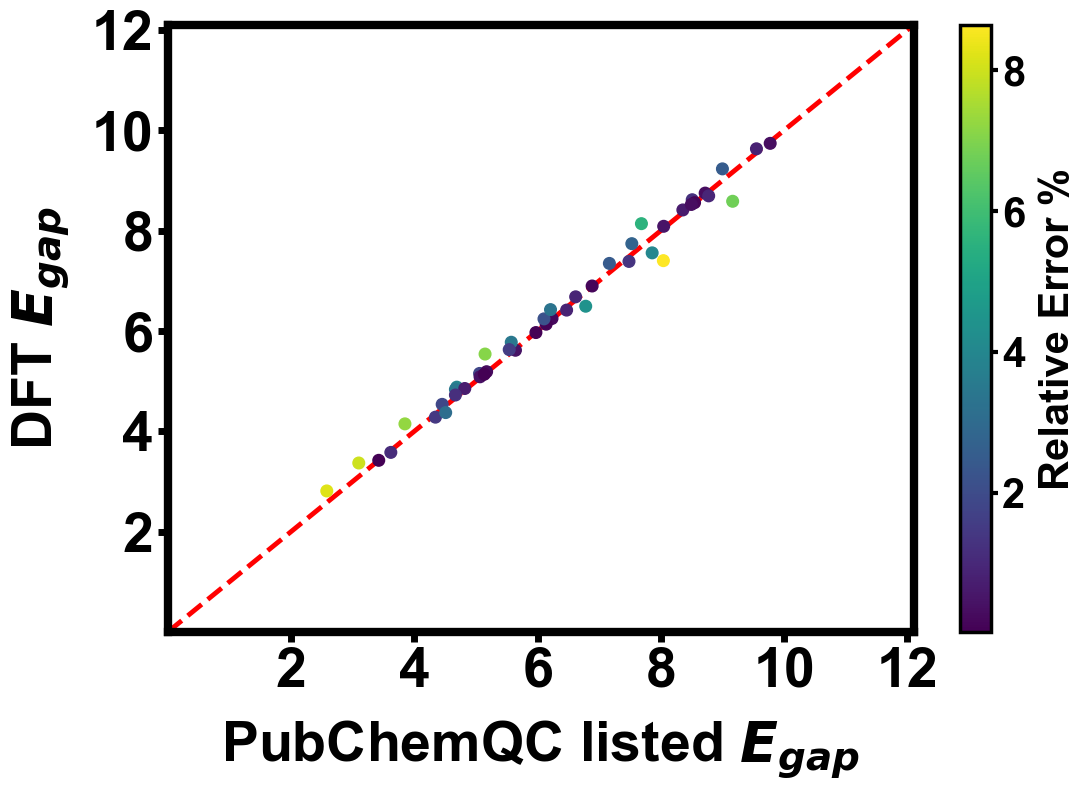

In [22]:

from scipy.optimize import curve_fit
import matplotlib as mpl

gap_range = (0, 12.1)
cMap = ListedColormap(['white', 'green', 'blue','red'])

Desired_gap = output_TDDFT_rep["gap_pubchemqc"]
DFT_gap = output_TDDFT_rep["DFT_gap"]


col = np.abs((DFT_gap-Desired_gap)/DFT_gap*100)
col_orig = np.copy(col)



mpl.rcParams['axes.linewidth'] = 2.5
fig, ax = plt.subplots(figsize = (14*0.8, 10*0.8))
plt.scatter(Desired_gap, DFT_gap, s=70, c=col_orig)

ax.tick_params(axis='both', which='major', labelsize=25)

plt.xlabel(r'PubChemQC listed $E_{gap}$', fontsize=40, fontname='Arial', fontweight="bold", labelpad=15)
plt.ylabel(r'DFT $E_{gap}$', fontsize=40, fontname='Arial', fontweight="bold", labelpad=15)

ax.tick_params(axis='both', which='major', labelsize=40, width=5, length=7)
[i.set_linewidth(6) for i in ax.spines.values()]

plt.xlim(gap_range)
plt.ylim(gap_range)
# how many numbers on the axes, delta
ax.xaxis.set_major_locator(tk.MultipleLocator(7))
ax.yaxis.set_major_locator(tk.MultipleLocator(7))
ax.grid(False)

lims=[gap_range[0], gap_range[1]]
plt.plot(lims, lims, '--', linewidth=3.5, c='red', alpha=1, zorder=0)


cbar = plt.colorbar(shrink=1)

#cbar.ax.set_ticks(20)

plt.xticks (( 2, 4, 6, 8, 10, 12))
plt.yticks (( 2, 4, 6, 8, 10, 12))

#cbar.set_ticks(loacator)
cbar.ax.set_ylabel('Relative Error %', fontsize=30, fontname='Arial', fontweight='bold', labelpad=10)
cbar.ax.tick_params(axis='both', which='major', labelsize=30,  width=3, length=5)

#cbar.ax.yaxis.set_major_locator(tk.MultipleLocator(0.5))
#cbar.solids.set_edgecolor("face")
#plt.draw()
plt.tight_layout()
plt.savefig('DFT_Des.png', dpi = 500, bbox_inches='tight')

In [23]:
output_TDDFT_rep.shape

(46, 4)